# Step 1: Convert JSON to CSV


In [38]:
import pandas as pd

with open('evaluation_results_arbert.json', 'r', encoding='utf-8') as f:
    data = pd.read_json(f)

data.to_csv('evaluation_results_arbert_csv_file.csv', index=False, encoding='utf-8')

# Step 2: Load the CSV and Perform Analysis


In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_recall_curve, confusion_matrix, f1_score, average_precision_score

df = pd.read_csv('evaluation_results_arbert_csv_file.csv')

df.head()

,category,query,ground_truth,top_5_documents,document_similarities,best_match_document,best_match_similarity,accuracy,recall
0,Art and Music,من هو لودفيج فان بيتهوفن، وما هي بعض أعماله ال...,لودفيج فان بيتهوفن هو مؤلف موسيقي ألماني ولد ع...,['\ufeffلودفيج فان بيتهوفن مؤلف موسيقي ألماني ...,"[0.939097166061401, 0.888951122760772, 0.78893...",﻿لودفيج فان بيتهوفن مؤلف موسيقي ألماني ولد عام...,0.939097,1.0,1
1,Art and Music,ما هي آلة الناي، وكيف يتم العزف عليها؟,الناي هي آلة نفخية تعد من أقدم الآلات الموسيقي...,['دينه. كما تناقش كيفية، تنظيف الفحم الحجري، و...,"[0.42343866825103704, 0.46390593051910406, 0.2...",ة الأخيرة حيث غنى بافاروتي Nessun Dorma وأدت ا...,0.463906,0.0,0
2,Art and Music,ما هي آلة العود، وما هو تاريخها؟,العود هي آلة موسيقية شرقية وترية يعود تاريخها ...,['دينه. كما تناقش كيفية، تنظيف الفحم الحجري، و...,"[0.495500922203063, 0.368715643882751, 0.28376...",دينه. كما تناقش كيفية، تنظيف الفحم الحجري، ونق...,0.495501,0.0,0
3,Art and Music,من هو الخطاط فريد العلي، وما هي إسهاماته في ال...,فريد العلي هو خطاط كويتي معروف بعمله في الخط ا...,['نصار الفريق الأول الذي يرى أن هناك فرصاً لإع...,"[0.324830025434494, 0.387432694435119, 0.26392...","﻿ تحت عنوان ""أزياء مشعة"" قدم المصمم اللبناني ب...",0.632346,0.4,1
4,Art and Music,ما هي أبرز أعمال المصمم اللبناني بسيل سودة؟,بسيل سودة هو مصمم أزياء لبناني قدم عروضاً ناجح...,"['\ufeff تحت عنوان ""أزياء مشعة"" قدم المصمم الل...","[0.854291319847106, 0.7139455080032341, 0.6807...","﻿ تحت عنوان ""أزياء مشعة"" قدم المصمم اللبناني ب...",0.854291,1.0,1


# Step 3: Calculate Metrics
### Accuracy and Recall :

In [40]:
df['accuracy'] = df['accuracy'].astype(float)
df['recall'] = df['recall'].astype(float)

category_metrics = df.groupby('category').agg({
    'accuracy': 'mean',
    'recall': 'mean'
}).reset_index()

category_metrics

,category,accuracy,recall
0,Art and Music,0.533333,0.800000
1,Education,0.260000,0.700000
2,Environment,0.160000,0.550000
3,Finance,0.323077,0.692308
4,Health,0.320000,0.700000
5,Politics,0.160000,0.500000
6,Religion,0.460000,0.800000
7,Science And Technology,0.440000,0.700000
8,Sport,0.080000,0.200000
9,Tourism,0.460000,0.800000


### F1 Score :


In [41]:
df['f1_score'] = 2 * (df['accuracy'] * df['recall']) / (df['accuracy'] + df['recall'])

category_f1 = df.groupby('category')['f1_score'].mean().reset_index()
print(category_f1)

                 category  f1_score
0           Art and Music  0.762897
1               Education  0.520408
2             Environment  0.430736
3                 Finance  0.606702
4                  Health  0.590136
5                Politics  0.464286
6                Religion  0.696925
7  Science And Technology  0.750000
8                   Sport  0.571429
9                 Tourism  0.681052


# Step 4: Visualizations :
### Accuracy and Recall by Category:


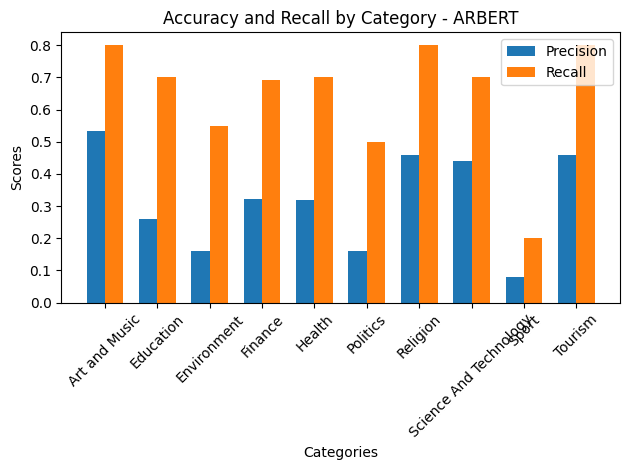

In [42]:
categories = category_metrics['category']
accuracy = category_metrics['accuracy']
recall = category_metrics['recall']

x = np.arange(len(categories))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, accuracy, width, label='Precision')
rects2 = ax.bar(x + width/2, recall, width, label='Recall')

ax.set_xlabel('Categories')
ax.set_ylabel('Scores')
ax.set_title('Accuracy and Recall by Category - ARBERT')
ax.set_xticks(x)
ax.set_xticklabels(categories, rotation=45)
ax.legend()

fig.tight_layout()
plt.show()

### F1 Score by Category :


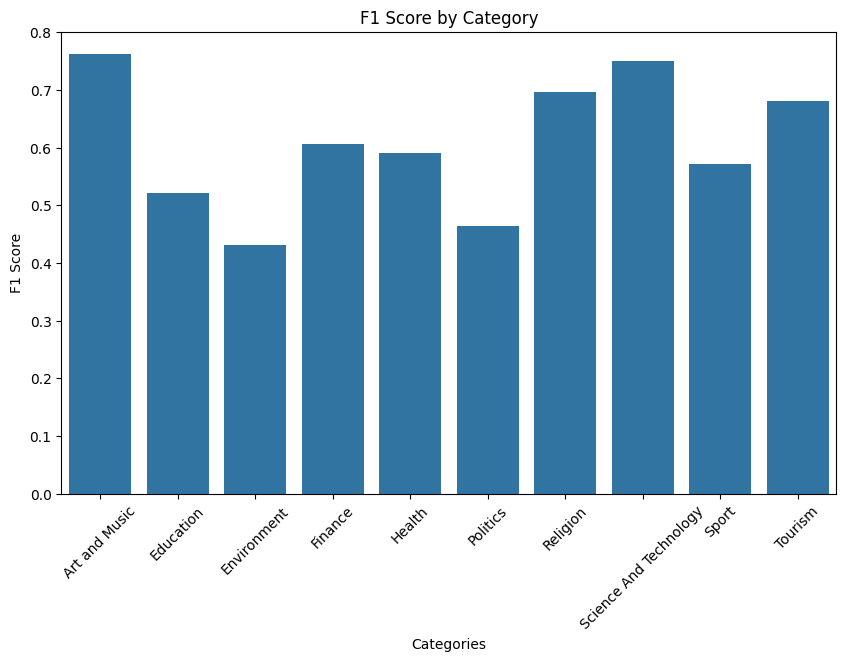

In [43]:
plt.figure(figsize=(10, 6))
sns.barplot(x='category', y='f1_score', data=category_f1)
plt.xlabel('Categories')
plt.ylabel('F1 Score')
plt.title('F1 Score by Category')
plt.xticks(rotation=45)
plt.show()

### Plot the distribution of best match similarity scores


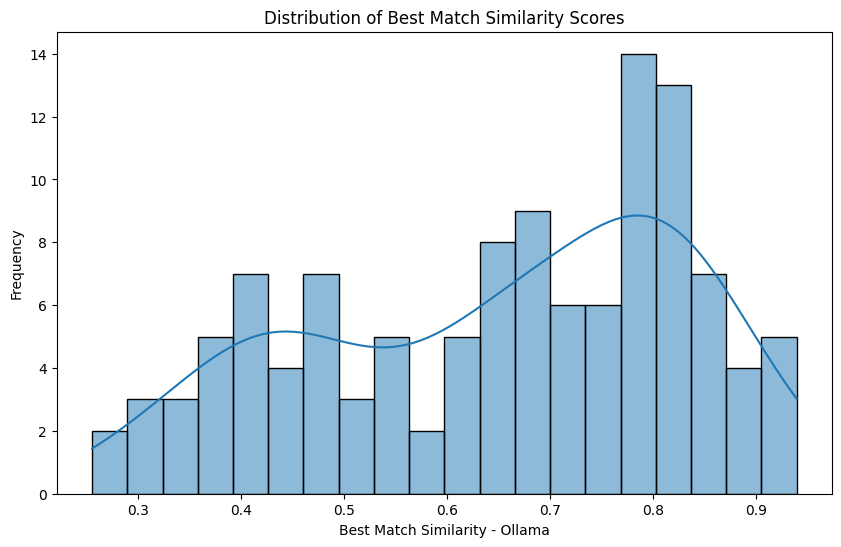

In [44]:
plt.figure(figsize=(10, 6))
sns.histplot(df['best_match_similarity'], bins=20, kde=True)
plt.title('Distribution of Best Match Similarity Scores')
plt.xlabel('Best Match Similarity - Ollama')
plt.ylabel('Frequency')
plt.show()